In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

In [3]:
# Hyperparameters
input_features = 28*28
hidden_features = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

### Loading MNIST dataset

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

**sample** contains 100 data samples because batch size=100. Each datapoint is 1\*28\*28 because only 1 channel is present.

labels  contains 100 elements.

In [6]:
dataiter = iter(train_loader)
samples, labels = next(dataiter)
print(np.array(samples).shape)
print(np.array(labels).shape)
print(len(train_loader))

(100, 1, 28, 28)
(100,)
600


### Visualizing data

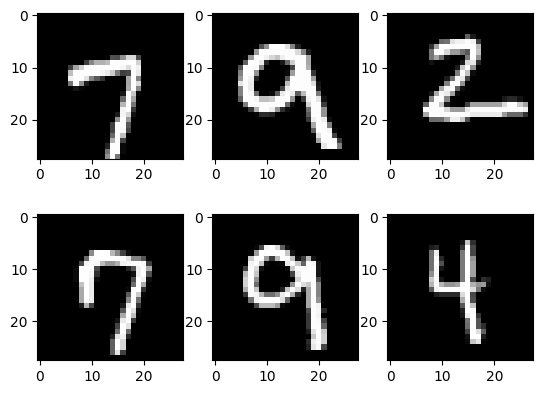

In [7]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

### Model

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_features, hidden_features, num_classes=10):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(in_features=input_features, out_features=hidden_features)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden_features, out_features=num_classes)

    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.relu(out1)
        out3 = self.linear2(out2)
        return out3

images shape is **(100, 1, 28, 28)**. But model expects it in shape **(100, 784)**. So, we have to reshape the data.

In [9]:
model = NeuralNetwork(input_features=input_features, hidden_features=hidden_features, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train loop
# This denotes the numberof batches
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for step, (images, labels) in enumerate(train_loader):
       images = images.reshape(-1, images.shape[2]*images.shape[3]).to(device)
       labels = labels.to(device)

       # Forward Pass
       outputs = model(images)
       loss = criterion(outputs, labels)

       # Backward pass
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       if (step+1)%10==0:
        print(f"Epoch {epoch+1}/{num_epochs}, Step {step+1}/{n_total_steps}, Loss = {loss.item():.4f}")


Epoch 1/2, Step 10/600, Loss = 1.9110
Epoch 1/2, Step 20/600, Loss = 1.4270
Epoch 1/2, Step 30/600, Loss = 1.0611
Epoch 1/2, Step 40/600, Loss = 0.6942
Epoch 1/2, Step 50/600, Loss = 0.7919
Epoch 1/2, Step 60/600, Loss = 0.6054
Epoch 1/2, Step 70/600, Loss = 0.6085
Epoch 1/2, Step 80/600, Loss = 0.5120
Epoch 1/2, Step 90/600, Loss = 0.6133
Epoch 1/2, Step 100/600, Loss = 0.4240
Epoch 1/2, Step 110/600, Loss = 0.4960
Epoch 1/2, Step 120/600, Loss = 0.4880
Epoch 1/2, Step 130/600, Loss = 0.3768
Epoch 1/2, Step 140/600, Loss = 0.4603
Epoch 1/2, Step 150/600, Loss = 0.3474
Epoch 1/2, Step 160/600, Loss = 0.3032
Epoch 1/2, Step 170/600, Loss = 0.3636
Epoch 1/2, Step 180/600, Loss = 0.3235
Epoch 1/2, Step 190/600, Loss = 0.5522
Epoch 1/2, Step 200/600, Loss = 0.3196
Epoch 1/2, Step 210/600, Loss = 0.3314
Epoch 1/2, Step 220/600, Loss = 0.1716
Epoch 1/2, Step 230/600, Loss = 0.3007
Epoch 1/2, Step 240/600, Loss = 0.4095
Epoch 1/2, Step 250/600, Loss = 0.4045
Epoch 1/2, Step 260/600, Loss = 0.

### Testing and Evaluation

In [10]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
       images = images.reshape(-1, images.shape[2]*images.shape[3]).to(device)
       labels = labels.to(device)

       outputs = model(images)
       _, predictions = torch.max(outputs, dim=1)
       n_samples += labels.shape[0]
       n_correct += (predictions==labels).sum().item()

    accuracy = 100.0*n_correct / n_samples
    print("Test Accuracy = ", accuracy)


Test Accuracy =  95.16
